# Logistic Regression exercise

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 12.) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
print(imgs.shape)
print(labels.shape)

(42000L, 784L)
(42000L,)


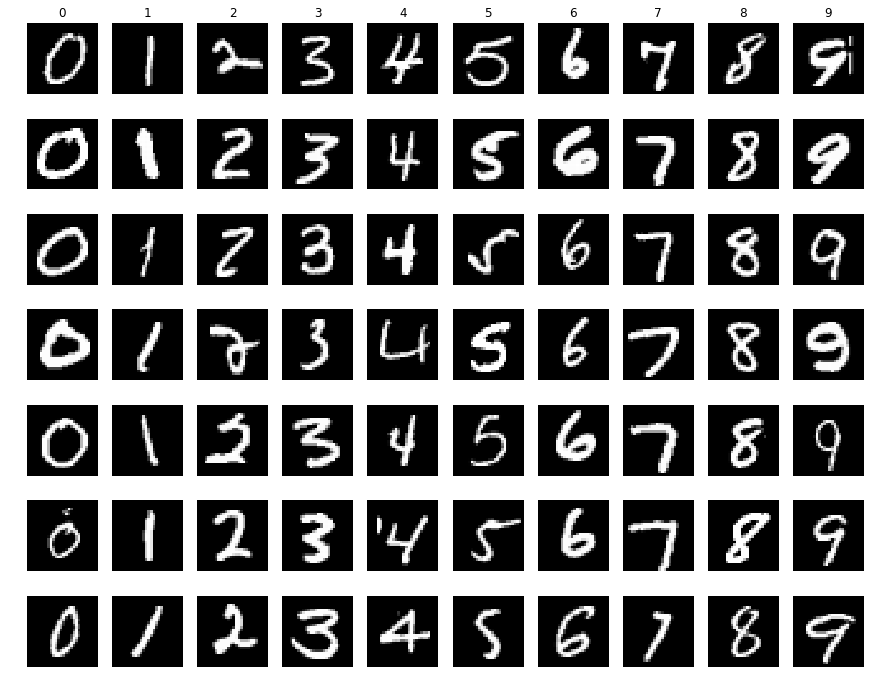

In [3]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(10)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [4]:
# transform the labels to binary
for i in xrange(len(labels)):
    if labels[i] != 0:
        labels[i] = 1
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [5]:
X_train_feats = X_train # choose and extract features
X_test_feats = X_test # choose and extract features

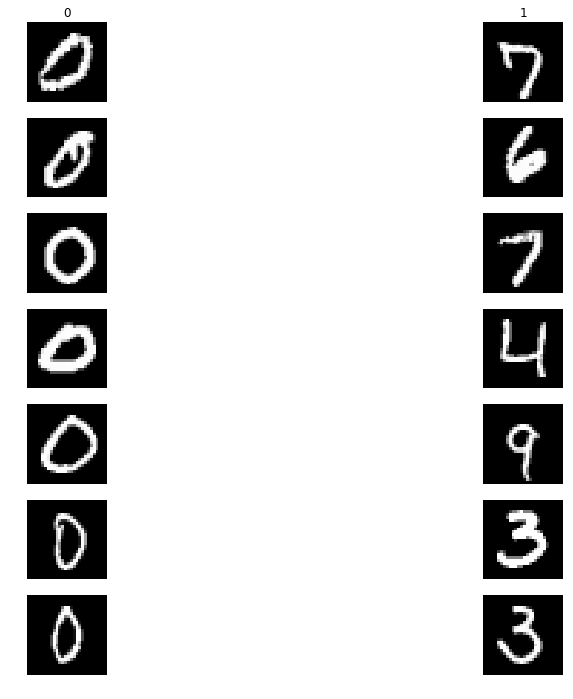

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = range(2)
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [7]:
from DSVC.classifiers import LogisticRegression

# Start training. 
# You should open DSVC/classifiers/logistic_regression.py and implement the function.
# Then run this cell.

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 1e-6,
    num_iters = 4000,
    batch_size = 64,
)

iteration 0 / 4000: loss 1.830484
iteration 1000 / 4000: loss 0.094357
iteration 2000 / 4000: loss 0.019384
iteration 3000 / 4000: loss 0.062198


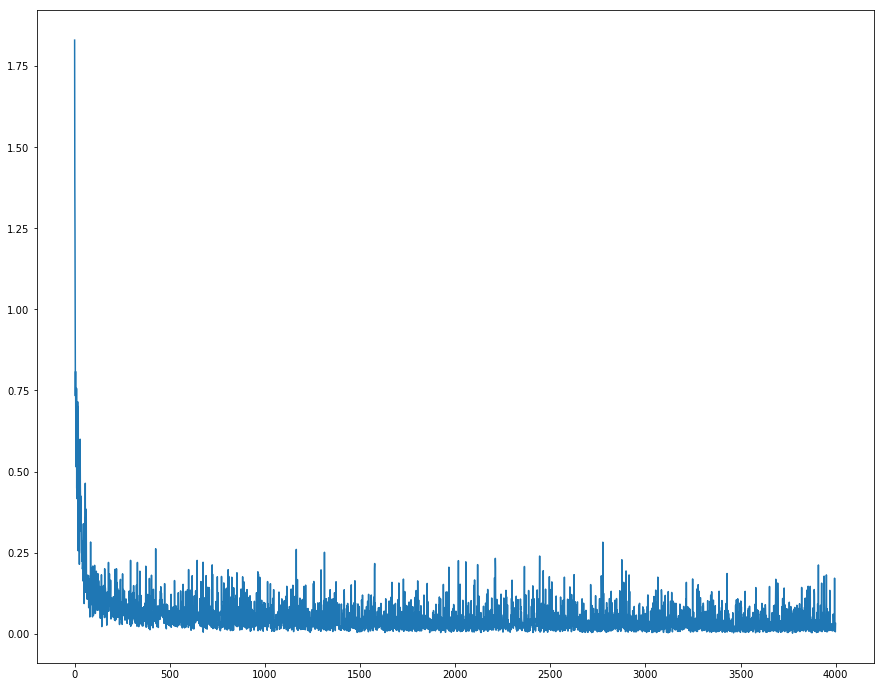

In [8]:
plt.plot(loss_history)

In [9]:
y_test_pred = classifier.predict(X_test_feats)
print "The accuracy socre is ", np.mean(y_test == y_test_pred)

The accuracy socre is  0.988428571429


you should get the accuracy higher than 96%.

----

### F1-Measure
Notice that, if our model always output '1', totally ignoring the input X, we can get a accuracy 90%.So, in this assignment, accuracy is not efficient enough. 

We will use F1-Measure to evaluate our model.

You may need this:
[F1-Measure](https://baike.baidu.com/item/f-measure/913107?fr=aladdin)

In [10]:
# Calculate the precision(准确率), recall(召回率) and F1
# important： We should consider label '0' as 'positive' here. 
# That means 'True positive' ==> '(y_test == 0) and (y_test_pred == 0)'

#######Your code here########
TP,FP,FN = 0.0,0.0,0.0
for i in range(len(y_test_pred)):
    if (y_test[i] == 0) and (y_test_pred[i] == 0):
        TP += 1
    elif (y_test[i] == 1) and (y_test_pred[i] == 0):
        FP += 1
    elif (y_test[i] == 0) and (y_test_pred[i] == 1):
        FN += 1
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print precision
print recall
print 'F1:', precision*recall*2/(precision+recall)

0.938861560084
0.946846208363
F1: 0.942836979534


you should get the F1 higher than 85%.

# Multiclass classification

Now, we use the Logistic Regression to classification handwritten digits. There are 10 class, from '0' to '9'.


Hint: The method "one vs all" may helpful. [Here is the introduction to "one vs all"](https://msdn.microsoft.com/library/en-us/Dn905887.aspx). 

In [11]:
# Read the data for you
data = pd.read_csv('./DSVC/datasets/MNIST.csv',header=0).values # change the path by yourself
imgs = data[0::,1::]
labels = data[::,0]
        
# 2/3 training set
# 1/3 test set
split_index = len(labels) * 2 / 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print X_train.shape
print X_test.shape

(28000L, 785L)
(14000L, 785L)


In [12]:
X_train_feats = X_train # choose and extract features
X_test_feats = X_test # choose and extract features

In [13]:
# Start training. 
# You should update your code in DSVC/classifiers/logistic_regression.py .
# Then run this cell.
from DSVC.classifiers import *

mu_classifier = SubLogisticRegression()
loss_history = mu_classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 1e-6,
    num_iters = 5000,
    batch_size = 64,
)

iteration 0 / 5000: loss 0.305619
iteration 1000 / 5000: loss 0.085214
iteration 2000 / 5000: loss 0.078365
iteration 3000 / 5000: loss 0.034475
iteration 4000 / 5000: loss 0.097304
iteration 0 / 5000: loss 2.402763
iteration 1000 / 5000: loss 0.046878
iteration 2000 / 5000: loss 0.101993
iteration 3000 / 5000: loss 0.125200
iteration 4000 / 5000: loss 0.005080
iteration 0 / 5000: loss 0.351889
iteration 1000 / 5000: loss 0.026232
iteration 2000 / 5000: loss 0.035686
iteration 3000 / 5000: loss 0.080172
iteration 4000 / 5000: loss 0.150905
iteration 0 / 5000: loss 1.687621
iteration 1000 / 5000: loss 0.087917
iteration 2000 / 5000: loss 0.115207
iteration 3000 / 5000: loss 0.032309
iteration 4000 / 5000: loss 0.130098
iteration 0 / 5000: loss 1.282674
iteration 1000 / 5000: loss 0.036003
iteration 2000 / 5000: loss 0.078362
iteration 3000 / 5000: loss 0.019313
iteration 4000 / 5000: loss 0.116406
iteration 0 / 5000: loss 3.142527
iteration 1000 / 5000: loss 0.176695
iteration 2000 / 50

In [14]:
# you may change your code in function `predict`
y_test_pred = mu_classifier.predict(X_test_feats)
print "The accruacy socre is ", np.mean(y_test == y_test_pred)

The accruacy socre is  0.898857142857


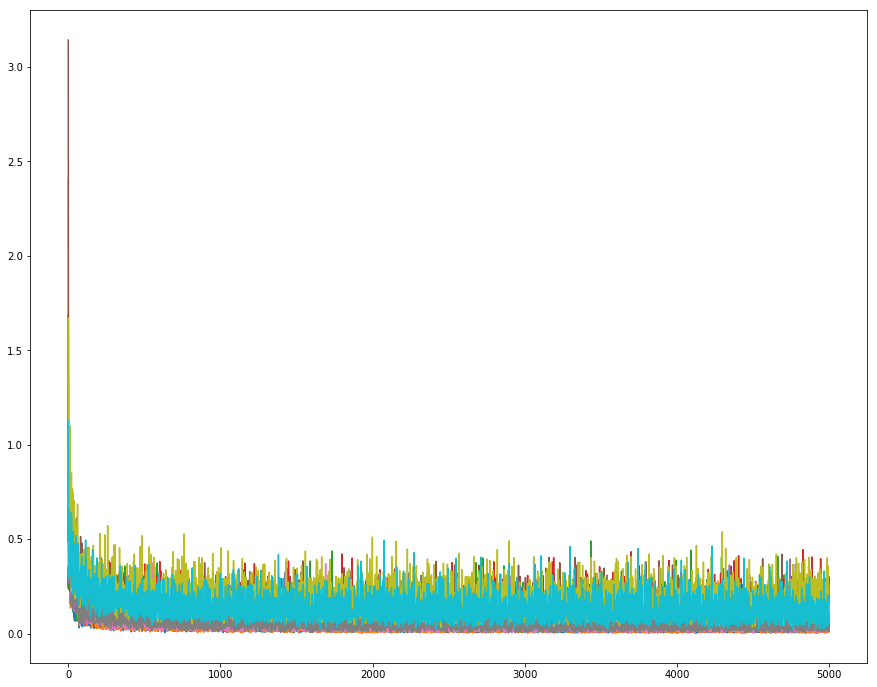

In [15]:
# 绘制 loss 衰减图
for i in xrange(10):
    plt.plot(loss_history[i])